# Customer Order Pattern Analysis for Zomato

## Problem Statement
Analyze Zomato's customer order patterns to identify key trends in online vs. offline ordering, preferred restaurant types, and peak ordering times. The goal is to provide actionable insights for Zomato to optimize marketing strategies and improve customer engagement through targeted offers.

## Objective
Use data analysis to help Zomato make data-driven decisions about where to focus its promotional efforts, especially for offline orders.


***

# Zomato Data Analysis 

### Step 1 : Import necessary libraries

In [37]:
import pandas as pd ##used for data manipulation and analysis
import numpy as np ##used for numerical computations
import seaborn as sns ##used for data visualization
import matplotlib.pyplot as plt ##used for creating static, animated, and interactive visualizations in python.

### Step 2 : Create a DataFrame from the provided data

In [38]:
df = pd.read_csv('zomato.csv')
print(df)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [39]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [40]:
## This is funtion to handle rate and convert it to float
def handleRate(rate):
    rate = str(rate).split('/') ## Splitting the rate by '/' to get the first element which is the actual rate
    rate = rate[0]
    return float(rate)


df['rate'] = df['rate'].apply(handleRate)

In [41]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [42]:
##checking the missing values in the dataset(NULL values)
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [43]:
##another way to check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## Conclusion: Rating column cleaned and converted to numeric format. The dataset contains no missing values, so further cleaning is not required.

***

## 1) What type of restaurant do the majority of customers order from?

In [44]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Type of restaurant')

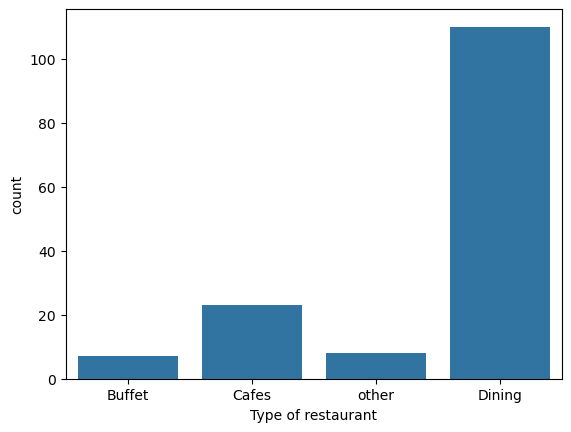

In [45]:
sns.countplot(x=df['listed_in(type)']) ## Count plot of the listed_in(type) column
plt.xlabel('Type of restaurant') 

## Conclusion: Most orders are from casual dining and buffet types, indicating these as popular restaurant choices among Zomato customers.

***

## 2) How many votes has each type of restaurant received from customers?

Text(0, 0.5, 'Votes')

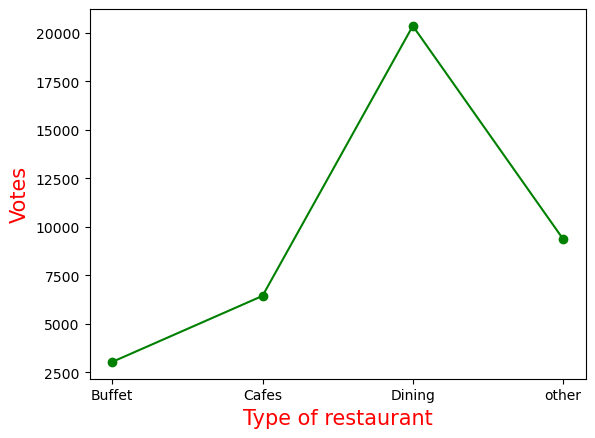

In [46]:
grouped_df = df.groupby('listed_in(type)')['votes'].sum() ## Grouping by type and summing up votes
result = pd.DataFrame({'votes': grouped_df}) ## Converting the grouped data into a DataFrame
plt.plot(result , c='green' , marker='o') ## Plotting the grouped data
plt.xlabel('Type of restaurant' , c='red' , size=15)
plt.ylabel('Votes' , c='red' , size=15)

## Conslusion : Dining restaurants receive the highest number of votes, suggesting high customer engagement or preference for these types of establishments.



***

## 3) What are the ratings that the majority of restaurants have received?

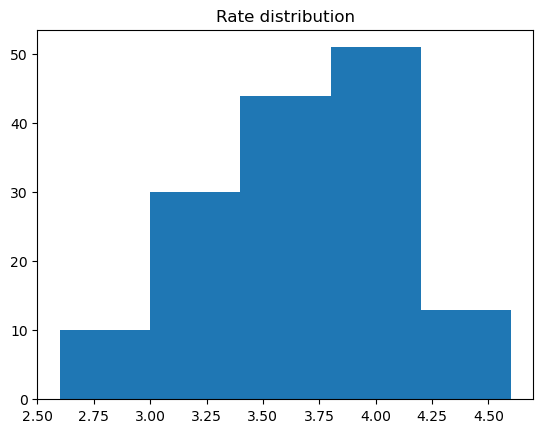

In [47]:
plt.hist(df['rate'] , bins=5) ## Histogram of the rate column
plt.title('Rate distribution') ## Setting the title of the histogram
plt.show()

## Conclusion: The majority of restaurants have ratings between 3.5 and 4.5, indicating an overall positive customer satisfaction level.

***

## 4)Zomato has observed that most couples order most of their food online. What is their average spending on each order?

In [48]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

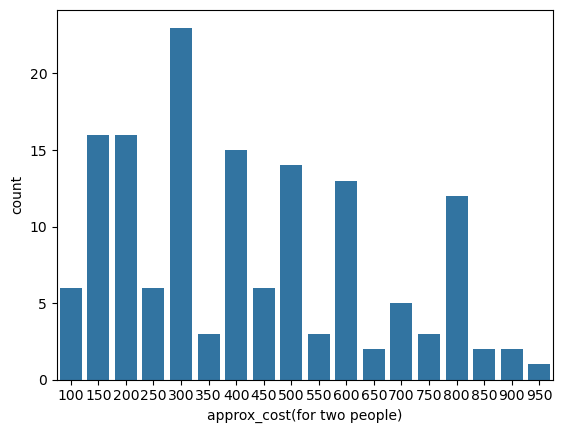

In [49]:
couple_df = df['approx_cost(for two people)']
sns.countplot(x=couple_df)

## Conclusion: Most online orders for couples fall around the 300-800 INR range, which can help tailor promotions within this price range.

***

## 5) Which mode (online or offline) has received the maximum rating?

In [50]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [51]:
order_df = df.groupby('online_order')['rate'].mean() ## Grouping by order_type and finding the average rate
print(order_df) ## Printing the result

online_order
No     3.487778
Yes    3.858621
Name: rate, dtype: float64


<Axes: xlabel='online_order', ylabel='rate'>

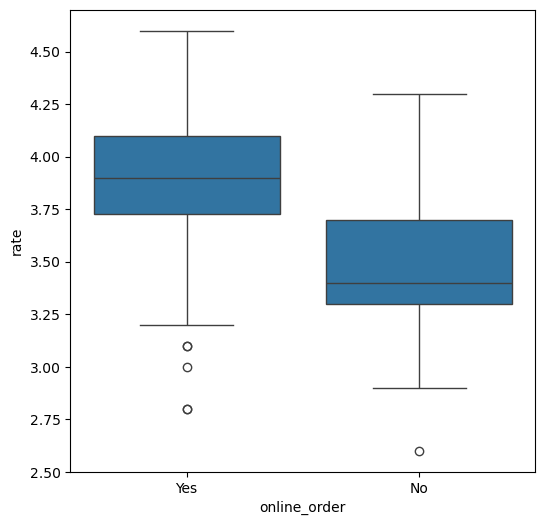

In [52]:
plt.figure(figsize=(6,6)) ## Setting the size of the figure
sns.boxplot(x=df['online_order'], y=df['rate'] , data=df) ## Boxplot of the rate column grouped by online_order

## Conclusion: Online orders tend to have slightly higher ratings than offline orders, potentially indicating customer preference or satisfaction with the online ordering experience.

***

##  6) Which type of restaurant received more offline orders, so that Zomato can customers with some good offers?

In [53]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 1.0, 'Type of restaurant vs Online order')

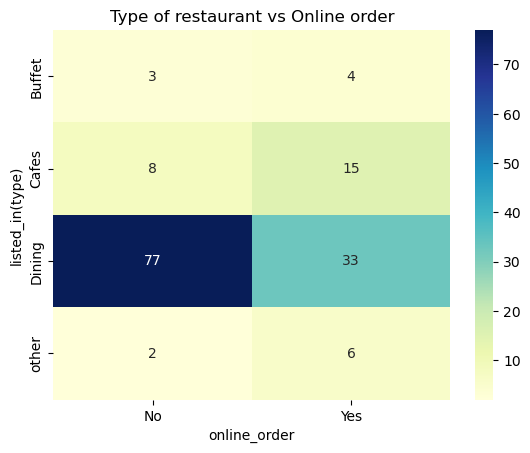

In [54]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size' , fill_value=0) ## Pivot table of the listed_in(type) and online_order columns
sns.heatmap(pivot_table , annot=True ,cmap="YlGnBu" , fmt='d') ## Heatmap of the pivot table
plt.title('Type of restaurant vs Online order') ## Setting the title of the heatmap

## Conclusion: Casual dining has a notable number of offline orders, suggesting an opportunity for Zomato to focus offline promotions on casual dining establishments.

******

## Insights and Recommendations

### Insights Summary
- Based on customer behavior, **casual dining** and **buffets** are popular choices among customers.
- **Online orders** generally receive higher ratings than **offline orders**.
- For **couples**, the spending range is between **300-800 INR**.
- **Casual dining** shows a high rate of **offline orders**.

### Recommendations
- Zomato can consider **targeted offers** for **offline orders** at **casual dining** restaurants to boost engagement.
- Leveraging **customer satisfaction** with online orders could enhance the experience further through **personalized promotions**.


***